In [10]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

variations

In [22]:
attributed_answers = [
    'answer-richtext',
    'answer-feature_snippet_answer_short',
    'answer-knowledge_panel_answer',
    'answer-medical',
    'answer-knowledge_health',
    'answer-dictionary',
]

blue_link_categories = [
    'organic-search_result',
    'amp-search_result',
    "youtube-search-result"
]


In [34]:
fn = '../data/output/tables/T1_area_freq_by_category.csv'

In [43]:
df = pd.read_csv(fn, header=[0,1], index_col =0)

In [44]:
df

Top of page           First page          
                      area      freq       area      freq
Google Answer     0.241734  0.704761   0.134510  0.993516
Google Product    0.384758  0.923964   0.275221  1.000000
Non-Google        0.192248  0.800118   0.447533  0.999869
AMP               0.120642  0.225817   0.133110  0.807126
Ads               0.060618  0.080752   0.009626  0.095095

In [1]:
# input
n_quantiles = 50
fn_metadata = f'../data/intermediary/element_metadata_15k_{n_quantiles}_quantiles.jsonl.gz'

In [5]:
cols = [
    'area_above_the_fold',
    'area_page'
]

In [51]:
pixels = {
    col : {
        'ad' : 0,
        'bluelink' : 0,
        'non-google-nbl' : 0,
        'google-nbl' : 0,
        'amp-nbl' : 0,
        'non-google': 0,
        'google' : 0,
        'amp' : 0,
        'attributed-answers' : 0,
        'everything' : 0,
        
    } for col in cols
}

for df in tqdm(pd.read_json(fn_metadata, 
                            lines=True, 
                            chunksize=40000)):
    for col in cols:
        ad = df[df.label == 'ads'][col].sum()
        blue =  df[df.category_standard.isin(blue_link_categories)][col].sum()
        
        
        o_nbl = df[(df.label == 'organic') & 
               (~df.category_standard.isin(blue_link_categories))][col].sum()
        
      
        g_nbl = df[(df.label == 'link') | (df.label == 'answer') & 
                (~df.category_standard.isin(blue_link_categories))][col].sum()
        
        amp_nbl = df[(df.label == 'amp') & 
                 (~df.category_standard.isin(blue_link_categories))][col].sum()
        
        o = df[df.label == 'organic'][col].sum()
        
      
        g = df[(df.label == 'link') | (df.label == 'answer')][col].sum()
        
        amp = df[df.label == 'amp'][col].sum()
        
        aa = df[df.category.isin(attributed_answers)][col].sum()
        
        everything = df[col].sum()
        
        pixels[col]['ad'] += ad
        pixels[col]['bluelink'] += blue
        pixels[col]['non-google-nbl'] += o_nbl
        pixels[col]['google-nbl'] += g_nbl
        pixels[col]['amp-nbl'] += amp_nbl
        pixels[col]['non-google'] += o
        pixels[col]['google'] += g
        pixels[col]['amp'] += amp        
        pixels[col]['attributed-answers'] += aa
        pixels[col]['everything'] += everything
   
    del df

30it [01:17,  2.57s/it]


In [63]:
col = cols[0]

In [76]:
s1_g = (pixels[col]['ad'] + pixels[col]['google']) / pixels[col]['everything']
s1_ng = pixels[col]['non-google'] / pixels[col]['everything']

In [89]:
s2_g = (pixels[col]['amp'] + pixels[col]['google']) / pixels[col]['everything']
s2_ng = pixels[col]['non-google'] / pixels[col]['everything']

In [90]:
s3_g = pixels[col]['google'] / pixels[col]['everything']
s3_ng = (pixels[col]['non-google'] + pixels[col]['amp']) / pixels[col]['everything']

In [91]:
s4_g = (pixels[col]['google'] - 
        pixels[col]['attributed-answers']) / pixels[col]['everything']
s4_ng = (pixels[col]['non-google'] + 
         pixels[col]['attributed-answers']) / pixels[col]['everything']

In [92]:
s5_g = pixels[col]['google-nbl'] / pixels[col]['everything']

s5_ng = (pixels[col]['bluelink'] + 
 pixels[col]['non-google-nbl']
) / pixels[col]['everything']

In [93]:
s6_g = (pixels[col]['google-nbl'] + 
 pixels[col]['amp-nbl'] +
 pixels[col]['non-google-nbl']
) / pixels[col]['everything']

s6_ng = pixels[col]['bluelink'] / pixels[col]['everything']

In [79]:
s6_ng = pixels[col]['bluelink'] / pixels[col]['everything']
s6_ng

0.10795064691735486

In [94]:
ng_range = [s1_ng, s2_ng, s3_ng, s4_ng, s5_ng, s6_ng] 
g_range = [s1_g, s2_g, s3_g, s4_g, s5_g, s6_g]

In [96]:
g = [min(g_range) * 100, 
     max(g_range) * 100]
g

[48.68398938378843, 83.14310819989333]

In [97]:
ng = [min(ng_range) * 100, 
      max(ng_range) * 100]
ng

[10.795064691735485, 33.19003122832934]

In [2]:
g = [48.6, 83.1]
ng = [10.8, 33.2]
gf = [37.9, 52]
ngf = [44.8, 55.8]

In [126]:
data = [{
        'category' : 'Google',
        'frame' : 'Top of Page',
        'area' : 62.6,
        'min' : 48.6,
        'max' : 83.1
    },

    {
        'category' : 'non-Google',
        'frame' : 'Top of Page',
        'area' : 19.2,
        'min' : 10.8,
        'max' : 33.2
    },

#     {
#         'category' : 'Google',
#         'frame' : 'First Page',
#         'area' : 41,
#         'min' : 37.9,
#         'max' : 52
#     },

#     {
#         'category' : 'non-Google',
#         'frame' : 'First Page',
#         'area' : 44.8,
#         'min' : 44.8,
#         'max' : 55.8
#     }
]

In [127]:
data = pd.DataFrame(data)

In [128]:
# data['name'] =  data['frame'] + ' ' + data['category']

In [151]:
data['name'] =  data['category']

In [130]:
name2name = {
    'Top of Page non-Google' : 'non-Google',
    'First Page non-Google' : 'non-Google '
}

In [131]:
# data['name'] = data['name'].replace(name2name)

In [132]:
data = data[::-1]

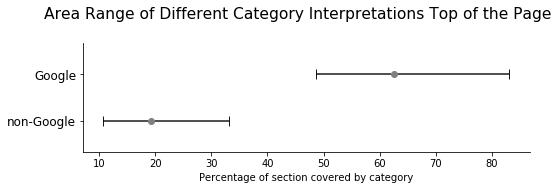

In [171]:
fig, ax = plt.subplots(figsize=(8, 2))
plt.scatter(data.area, data.name, zorder=100, color='grey')

plt.errorbar(data.area, 'name', 
             data=data,
             xerr=[data['area'] -data['min'], 
                   data['max'] - data['area']], 
             ecolor='k', color='white',
             capsize = 5,  fmt='o',
             alpha=.9)

plt.title("Area Range of Different Category Interpretations Top of the Page",
           x=0.48,
           y=1.17,
           size=15.5)

ax.set_xlabel("Percentage of section covered by category")


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tick_params(axis='y', which='major', labelsize=12)
ax.margins(y=0.6)